In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt, mpld3
import terminalLogic
from terminalLogic import Algo
import client
from client import engine
from typing import Optional, Dict, Any, List
from ciso8601 import parse_datetime
from requests import Request, Session, Response
import pandas as pd
import numpy as np
import datetime
import time
from matplotlib.animation import FuncAnimation
from mpld3 import plugins

In [2]:
# url = engine()
# data = url.getData()
# df = data
# df.to_csv('btc1mslice.csv')
# df

In [3]:
df = pd.read_csv('../data/minute.csv')
df.drop(df.columns[[0]], axis=1,inplace=True)
df

,startTime,time,open,high,low,close,volume,9-min,21-min,signal,market_returns,trend_returns,entry,ma,ratio,position,entryR,range_returns,sign
0,2021-10-10T23:31:00+00:00,1.633909e+12,54802.0,54812.0,54771.0,54771.0,59829.9835,54868.666667,54856.714286,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-10T23:32:00+00:00,1.633909e+12,54771.0,54787.0,54763.0,54772.0,53784.0348,54853.111111,54854.190476,-1.0,0.000018,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-10T23:33:00+00:00,1.633909e+12,54772.0,54772.0,54751.0,54753.0,95066.3010,54836.444444,54849.857143,-1.0,-0.000347,-0.000018,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-10T23:34:00+00:00,1.633909e+12,54753.0,54771.0,54726.0,54736.0,56553.9943,54817.111111,54844.333333,-1.0,-0.000311,0.000347,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-10T23:35:00+00:00,1.633909e+12,54736.0,54747.0,54690.0,54691.0,136057.1761,54802.111111,54838.095238,-1.0,-0.000822,0.000311,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2021-10-12T00:05:00+00:00,1.633997e+12,57266.0,57298.0,57164.0,57175.0,275213.9106,57407.000000,57374.714286,1.0,-0.001590,-0.002146,0.0,57407.000000,0.995959,1.0,0.0,-0.001590,-1.0
1475,2021-10-12T00:06:00+00:00,1.633997e+12,57175.0,57175.0,57122.0,57133.0,584080.5351,57383.000000,57370.714286,1.0,-0.000735,-0.001590,0.0,57383.000000,0.995643,1.0,0.0,-0.000735,-1.0
1476,2021-10-12T00:07:00+00:00,1.633997e+12,57133.0,57179.0,57119.0,57129.0,320245.2066,57347.888889,57365.095238,-1.0,-0.000070,0.000735,-2.0,57347.888889,0.996183,1.0,0.0,-0.000070,1.0
1477,2021-10-12T00:08:00+00:00,1.633997e+12,57129.0,57149.0,57096.0,57098.0,546850.5999,57309.000000,57358.000000,-1.0,-0.000543,0.000070,0.0,57309.000000,0.996318,1.0,0.0,-0.000543,1.0


In [4]:
df1 = Algo.fullstate(df, df)
df1.dropna(inplace=True)
df2 = df1
df2

,startTime,time,open,high,low,close,volume,9-min,21-min,signal,market_returns,trend_returns,entry,ma,ratio,position,entryR,range_returns,sign
33,2021-10-11T00:04:00+00:00,1.633911e+12,54475.0,54628.0,54466.0,54595.0,2.581353e+06,54674.444444,54632.619048,1.0,0.002219,-0.003902,0.0,54674.444444,0.998547,1.0,0.0,0.002219,-1.0
34,2021-10-11T00:05:00+00:00,1.633911e+12,54595.0,54696.0,54592.0,54696.0,1.509717e+06,54663.000000,54631.285714,1.0,0.001848,0.002219,0.0,54663.000000,1.000604,1.0,0.0,0.001848,1.0
35,2021-10-11T00:06:00+00:00,1.633911e+12,54695.0,54754.0,54679.0,54754.0,5.109066e+05,54660.888889,54633.571429,1.0,0.001060,0.001848,0.0,54660.888889,1.001703,1.0,0.0,0.001060,1.0
36,2021-10-11T00:07:00+00:00,1.633911e+12,54754.0,54825.0,54741.0,54775.0,1.256293e+06,54654.666667,54641.238095,1.0,0.000383,0.001060,0.0,54654.666667,1.002202,1.0,0.0,0.000383,1.0
37,2021-10-11T00:08:00+00:00,1.633911e+12,54775.0,54830.0,54761.0,54797.0,4.233508e+05,54660.111111,54650.904762,1.0,0.000402,0.000383,0.0,54660.111111,1.002504,-1.0,-2.0,0.000402,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2021-10-12T00:05:00+00:00,1.633997e+12,57266.0,57298.0,57164.0,57175.0,2.752139e+05,57407.000000,57374.714286,1.0,-0.001590,-0.002146,0.0,57407.000000,0.995959,1.0,0.0,-0.001590,-1.0
1475,2021-10-12T00:06:00+00:00,1.633997e+12,57175.0,57175.0,57122.0,57133.0,5.840805e+05,57383.000000,57370.714286,1.0,-0.000735,-0.001590,0.0,57383.000000,0.995643,1.0,0.0,-0.000735,-1.0
1476,2021-10-12T00:07:00+00:00,1.633997e+12,57133.0,57179.0,57119.0,57129.0,3.202452e+05,57347.888889,57365.095238,-1.0,-0.000070,0.000735,-2.0,57347.888889,0.996183,1.0,0.0,-0.000070,1.0
1477,2021-10-12T00:08:00+00:00,1.633997e+12,57129.0,57149.0,57096.0,57098.0,5.468506e+05,57309.000000,57358.000000,-1.0,-0.000543,0.000070,0.0,57309.000000,0.996318,1.0,0.0,-0.000543,1.0


## Trend positions

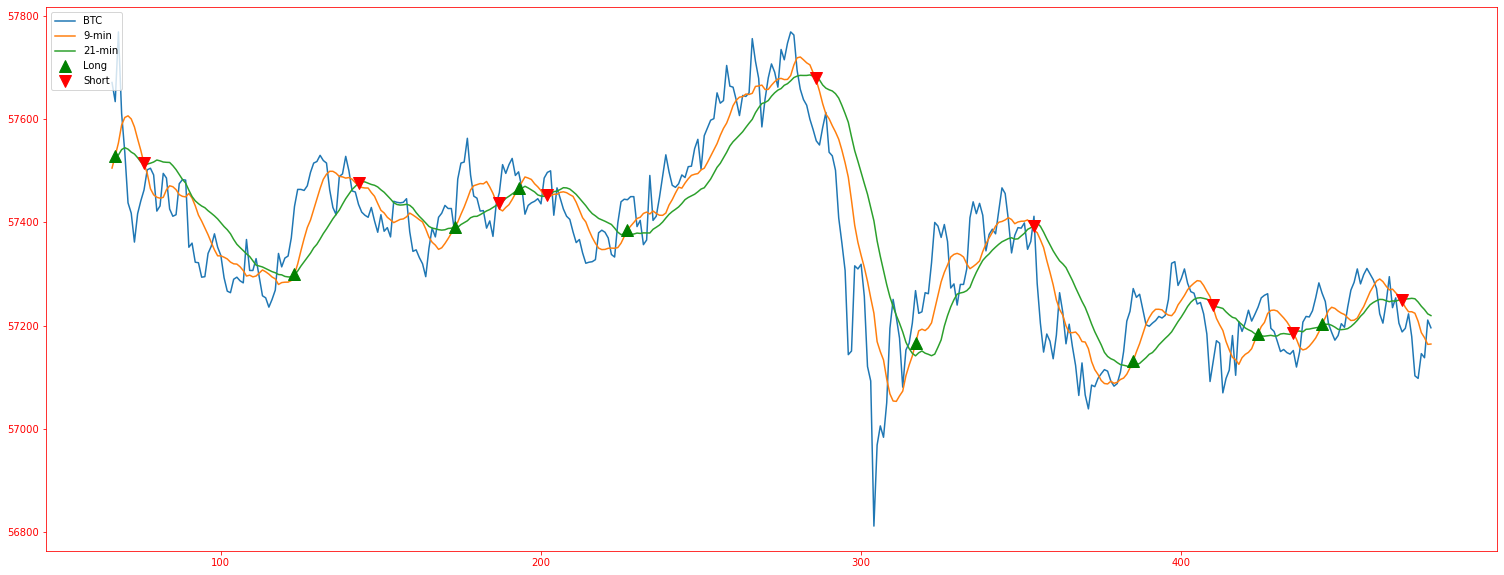

In [5]:

import mpld3

def figureT():

        
        df = pd.read_csv('../data/btcperp1m.csv')
        df.drop(df.columns[[0]], axis=1,inplace=True)
        df1 = Algo.fullstate(df, df)
        df1.dropna(inplace=True)
        df2 = df1
        fig, ax = plt.subplots()
        fig.set_size_inches(26,10)
        plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
        plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
        plt.plot(df2.iloc[-500:]['21-min'], label = '21-min')
        plt.plot(df2[-500:].loc[df2.entry == 2].index, df2[-500:]['9-min'][df2.entry == 2], "^",
                color = "g", markersize = 12, label= "Long")
        plt.plot(df2[-500:].loc[df2.entry == -2].index, df2[-500:]['21-min'][df2.entry == -2], "v",
                color = "r", markersize = 12, label="Short")
        plt.legend(loc=2);
        mpld3.save_html(fig,'C:/Users/tbrid/terminalLogic/web/assets/positionsT.html')
a = figureT()
a

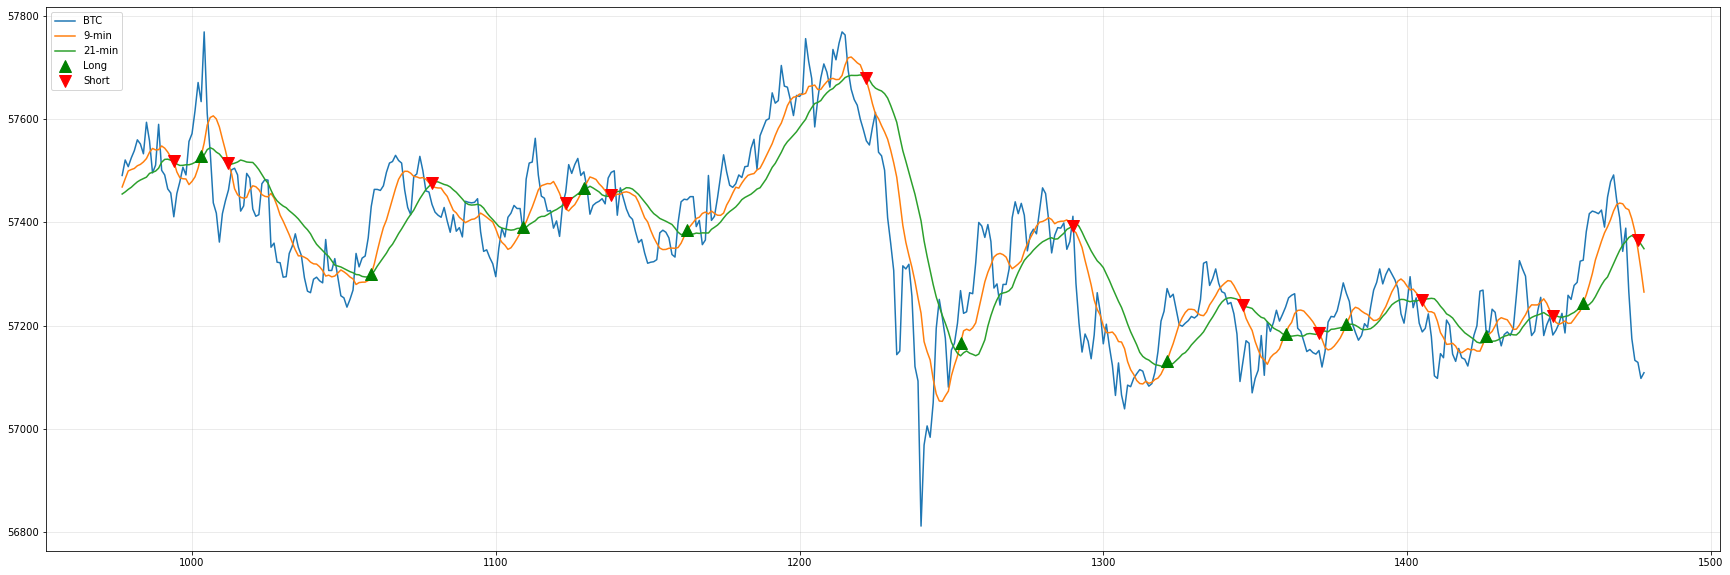

In [6]:
t = Algo.plot_positionT(df2)
t

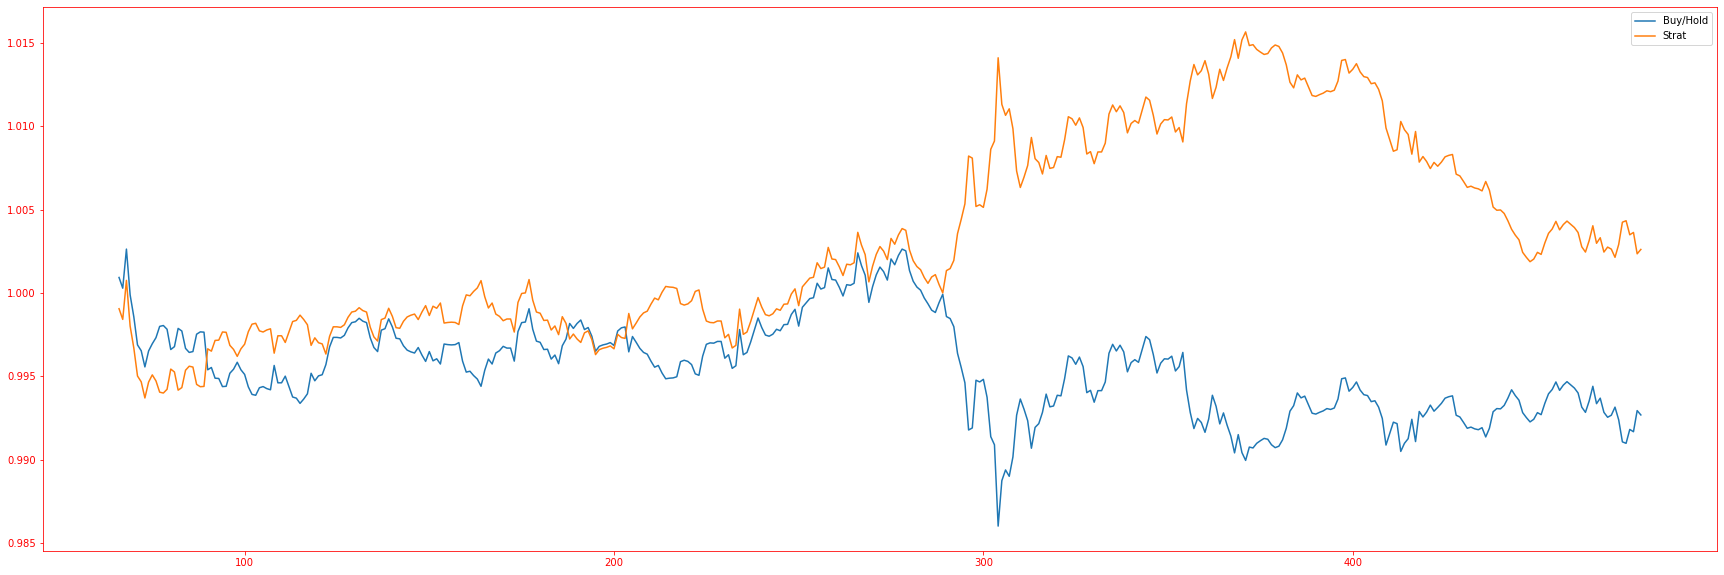

In [7]:
def figureCumprod():
    with plt.rc_context({'axes.edgecolor' : 'red', 'xtick.color' : 'red' , 'ytick.color' : 'red'}):
        
        df = pd.read_csv('../data/btcperp1m.csv')
        df.drop(df.columns[[0]], axis=1,inplace=True)
        df1 = Algo.fullstate(df, df)
        df1.dropna(inplace=True)
        df2 = df1
        fig, ax = plt.subplots()
        df2['trend_returns'] = df2.signal * df2.market_returns
        plt.plot(np.exp(df2.market_returns).cumprod(),label = "Buy/Hold")
        plt.plot(np.exp(df2.trend_returns).cumprod(),label = "Strat")
        plt.legend()
        mpld3.save_html(fig,'C:/Users/tbrid/terminalLogic/web/assets/TrendCumprod.html')
e = figureCumprod()
e

# Trend Algo Performance

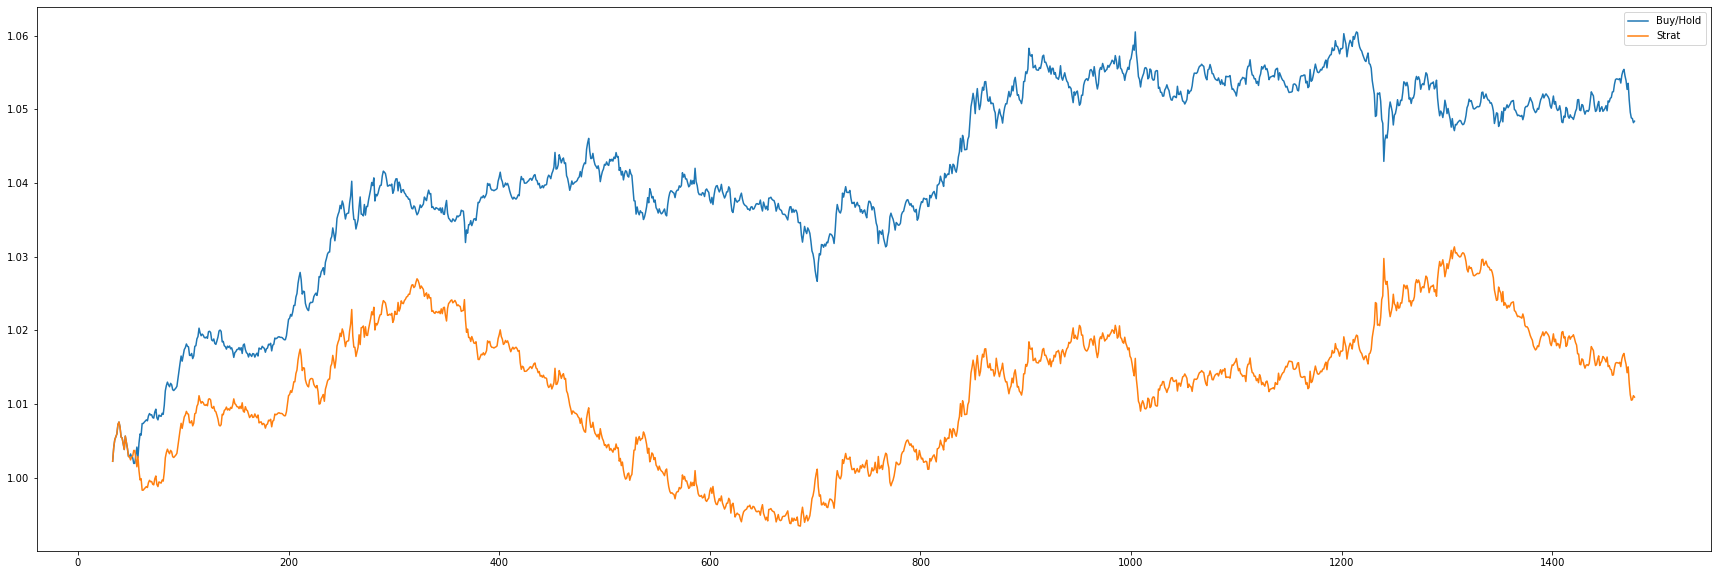

In [8]:


trendPlot = Algo.plot_gainzT(df2)
trendPlot

In [9]:
trendRets = Algo.trend_gainz(df2)
trendRets

Market Returns:  1.0483717002606747
Trend Strategy Returns:  1.0109303035643735


# Range positions

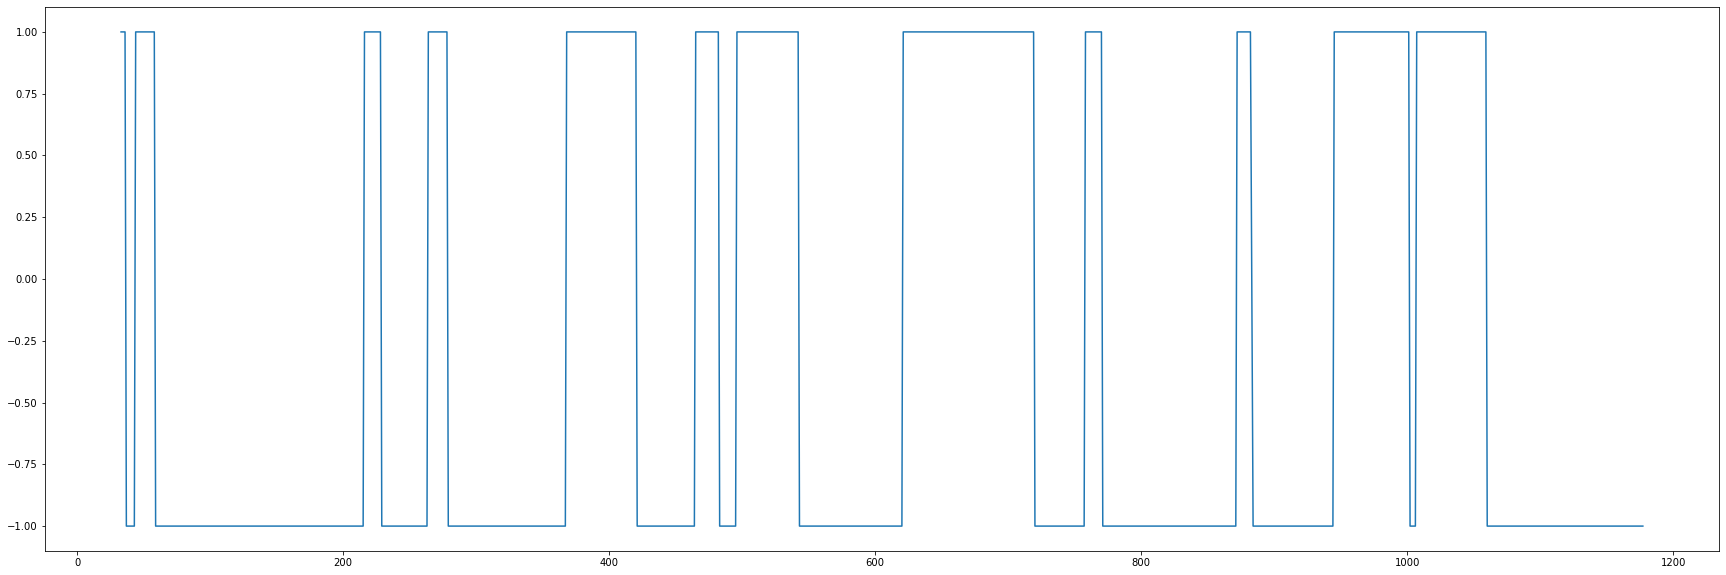

In [10]:
r = Algo.plot_positionR(df2.head(-300))
r
# always long or short never flat

In [11]:
# p = Algo.plot_percentiles(df2.head(-500))
# p

C:\Users\tbrid\anaconda3\lib\site-packages\mpld3\mplexporter\exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


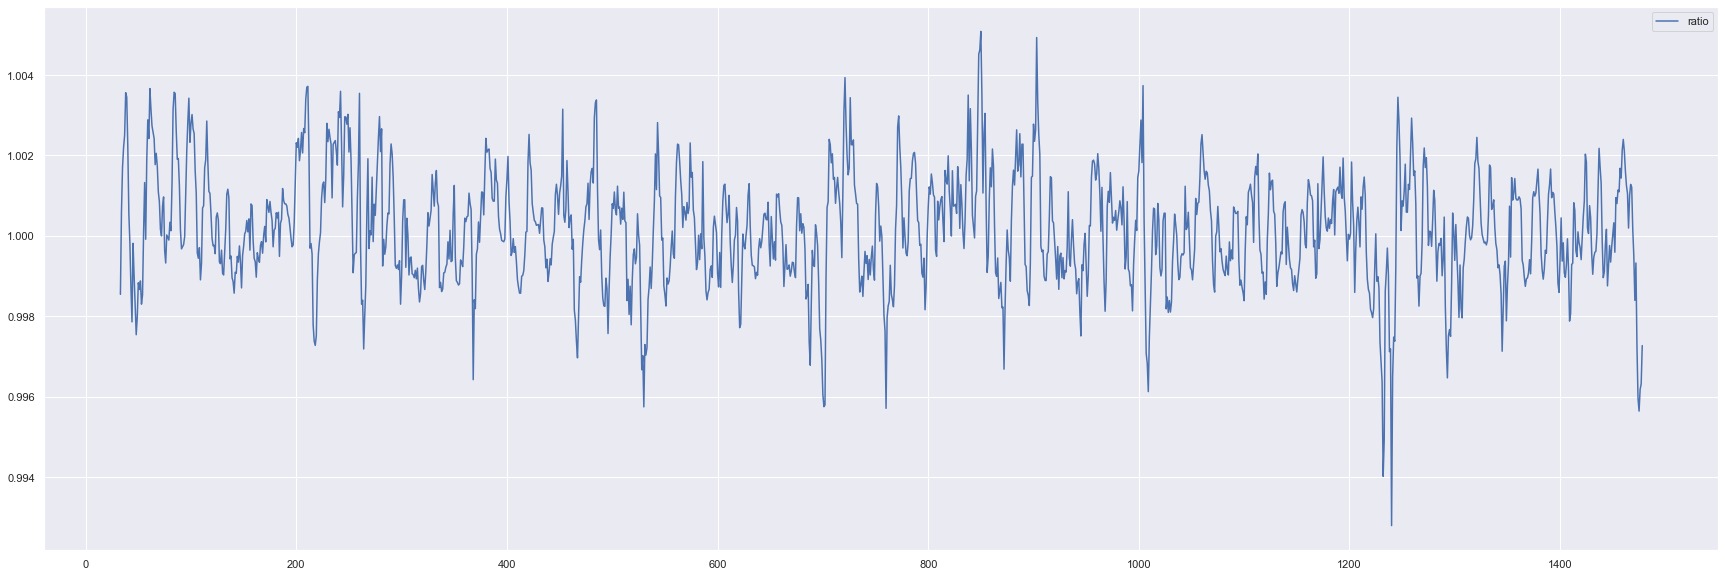

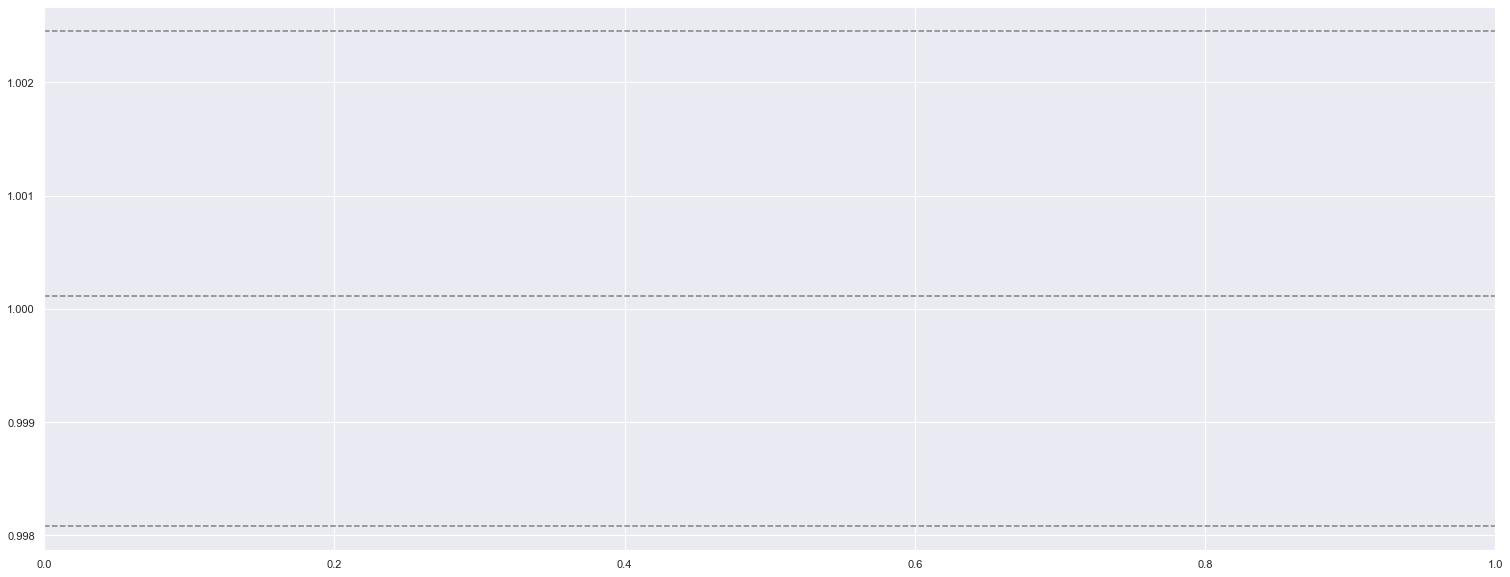

In [25]:
import seaborn as sns
def rangeHTML():
        with plt.rc_context({'axes.edgecolor' : 'red', 'xtick.color' : 'red' , 'ytick.color' : 'red'}):
            sns.set()
            percentiles = [5, 10, 50, 90, 95]
            p = np.percentile(df2['ratio'].dropna(), percentiles)
            df2['ratio'].dropna().plot(legend = True)
            fig, ax = plt.subplots()
            fig.set_size_inches(26,10)
            plt.axhline(p[0], c= (.5,.5,.5), ls='--')
            plt.axhline(p[2], c= (.5,.5,.5), ls='--')
            plt.axhline(p[-1], c= (.5,.5,.5), ls='--');
            mpld3.save_html(fig,'C:/Users/tbrid/terminalLogic/web/assets/positionsR.html')
            
fg = rangeHTML()
fg

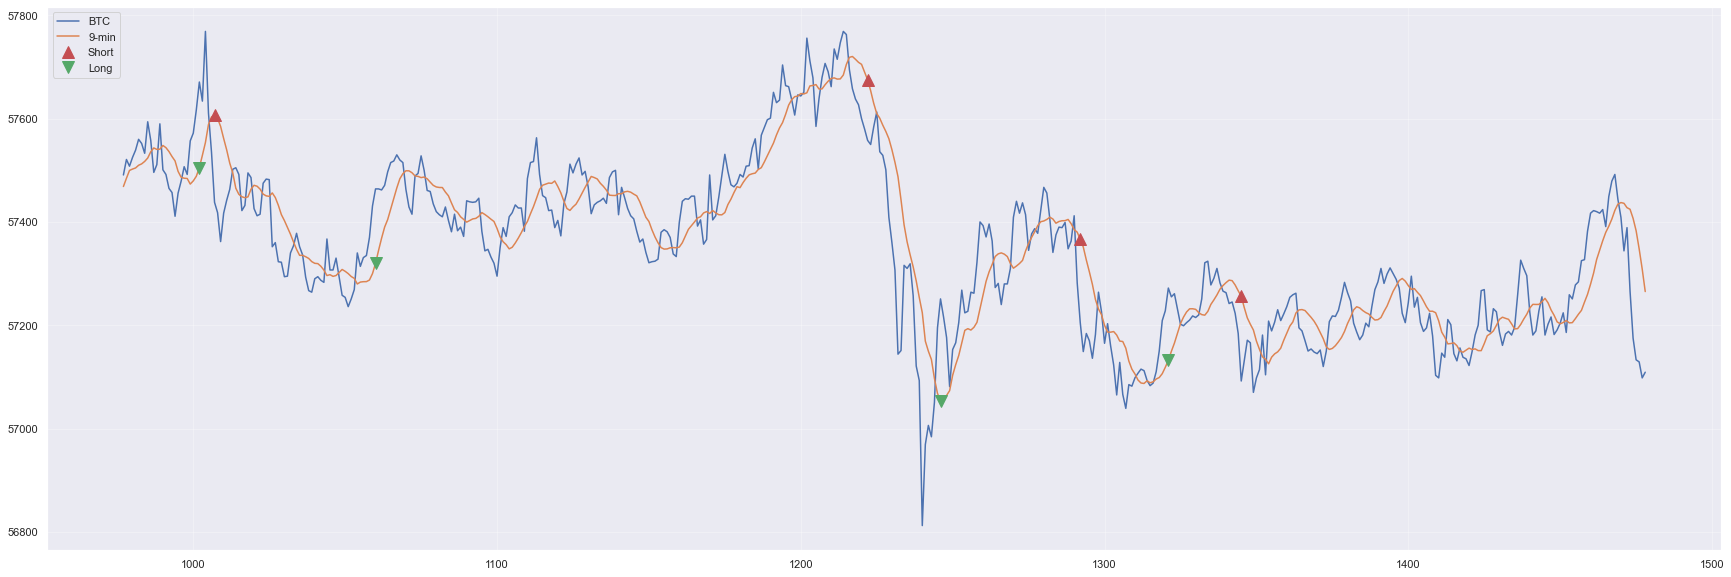

In [13]:
plt.rcParams['figure.figsize'] = 30,10
plt.grid(True, alpha = .3)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2[-500:].loc[df2.entryR == 2].index, df2[-500:]['9-min'][df2.entryR == 2], "^",
        color = "r", markersize = 12, label= "Short")
plt.plot(df2[-500:].loc[df2.entryR == -2].index, df2[-500:]['9-min'][df2.entryR == -2], "v",
        color = "g", markersize = 12, label="Long")
plt.legend(loc=2);

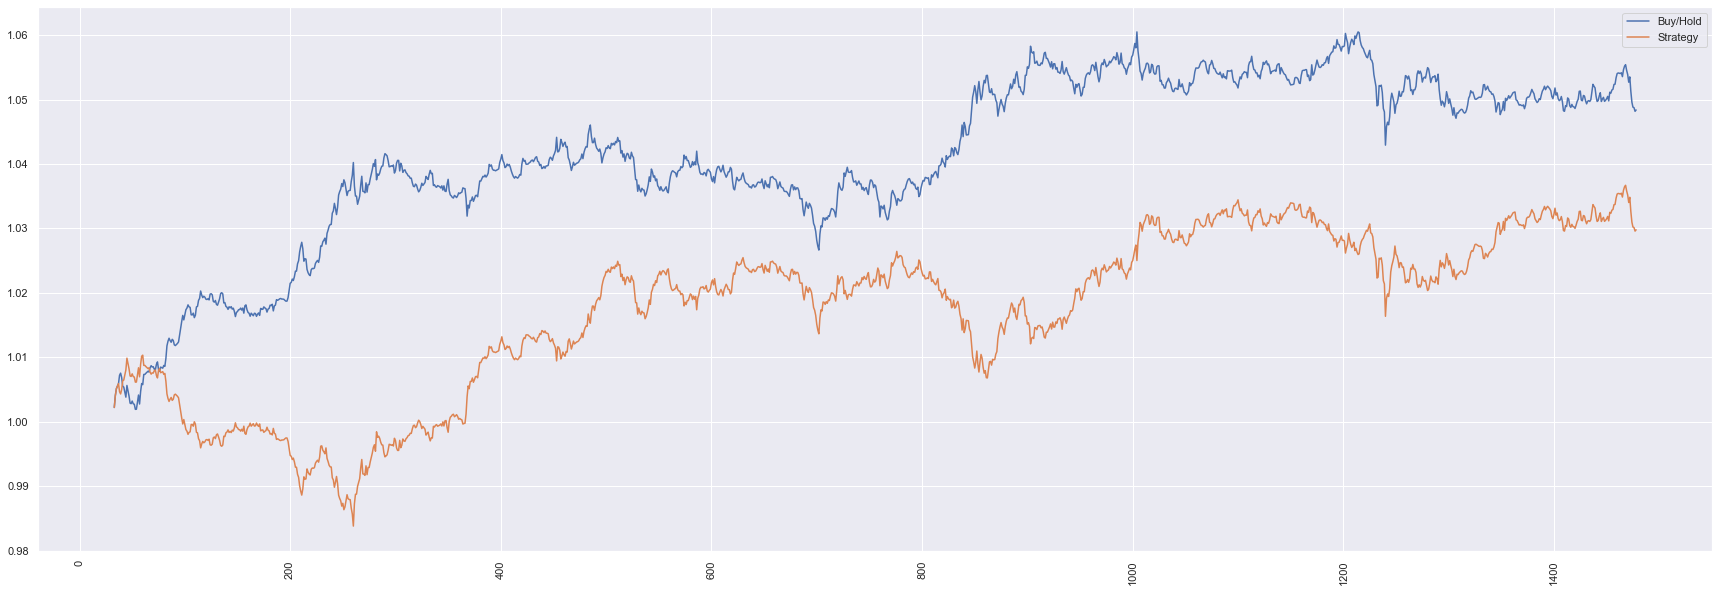

In [14]:
rangeRet = Algo.market_returnsR(df2)
rangeRet

In [15]:
rangeRets = Algo.range_gainz(df2)
rangeRets

Market Returns:  1.0483717002606747
Range Strategy Returns:  1.029781657112513


In [16]:
bestFit = df2[['time','close', 'market_returns','range_returns', 'trend_returns']]
bestFit.head(30)

,time,close,market_returns,range_returns,trend_returns
33,1.633911e+12,54595.0,0.002219,0.002219,0.002219
34,1.633911e+12,54696.0,0.001848,0.001848,0.001848
35,1.633911e+12,54754.0,0.001060,0.001060,0.001060
36,1.633911e+12,54775.0,0.000383,0.000383,0.000383
37,1.633911e+12,54797.0,0.000402,0.000402,0.000402
38,1.633911e+12,54867.0,0.001277,-0.001277,0.001277
39,1.633911e+12,54885.0,0.000328,-0.000328,0.000328
40,1.633911e+12,54848.0,-0.000674,0.000674,-0.000674
41,1.633911e+12,54774.0,-0.001350,0.001350,-0.001350
42,1.633911e+12,54767.0,-0.000128,0.000128,-0.000128


In [17]:
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] > bestFit['trend_returns'],
#                                             bestFit['range_returns'], np.nan)
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] < bestFit['trend_returns'],
#                                             bestFit['range_returns'], bestFit['minuteTF_maxVal'])
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] == bestFit['trend_returns'],
#                                             bestFit['range_returns'], bestFit['minuteTF_maxVal'])
# # bestFit['20m_maxVal'] = bestFit['minuteTF_maxVal'].shift(-20)
# fitList =  bestFit['minuteTF_maxVal'].shift(-20)


* check val in each algo_return, determine greatest val, declear winner
* if declared winner, iterate forward len(X_minutes) in winner col and append new val to list
* check both val at winning location for greatest val, decleare winner
* iterate forward len(X_min) in winning col and append val to list
* repeat, i think..

In [18]:
count=[]
selectVal = []
greatestVal = []
signal = ''
period = 3

for j, k in bestFit.iterrows():
    count.append(1)    
    if len(count) == period:
        selectVal.append(["time", k['market_returns'], "rangeRet", k['range_returns'], "trendRet", k['trend_returns']])
        if k['range_returns'] > k['trend_returns']:
            signal = -1
            greatestVal.append([ signal, k['range_returns']])
#             selectVal.append([k['range_returns'], signal])
#             np.insert(winnerVal, 1, greatestVal, axis = 1)
        elif k['range_returns'] < k['trend_returns']:
            signal = 1
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        else:
            k['range_returns'] == k['trend_returns']
            signal = 0
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        count = []

record=np.concatenate((selectVal,greatestVal), axis=1)
record

        
df3 = pd.DataFrame((record),
                     columns=['time', 'market_returns', 'range','rangeRet', 'trend', 'trendRet', 'winningAlgo', 'winnersRets'])   
df3.drop(['range', 'trend'], axis = 1, inplace=True)
record


array([['time', '0.0010598447771439368', 'rangeRet', ...,
        '0.0010598447771439368', '0.0', '0.0010598447771439368'],
       ['time', '0.0012766269606618863', 'rangeRet', ...,
        '0.0012766269606618863', '1.0', '0.0012766269606618863'],
       ['time', '-0.0013500941643158626', 'rangeRet', ...,
        '-0.0013500941643158626', '-1.0', '0.0013500941643158626'],
       ...,
       ['time', '-0.0006094747387255239', 'rangeRet', ...,
        '-0.0006094747387255239', '0.0', '-0.0006094747387255239'],
       ['time', '-0.0021455679592783383', 'rangeRet', ...,
        '-0.0021455679592783383', '0.0', '-0.0021455679592783383'],
       ['time', '-7.001452804367148e-05', 'rangeRet', ...,
        '7.001452804367148e-05', '1.0', '7.001452804367148e-05']],
      dtype='<U32')

In [19]:
df3['addTrend'] = df3['trendRet'].shift(-1)
df3['addRange'] = df3['rangeRet'].shift(-1)
df3['result'] = np.where(df3['trendRet'] > df3['rangeRet'], df3['addTrend'], np.nan)
df3['result'] = np.where(df3['trendRet'] < df3['rangeRet'], df3['addRange'], df3['result'])
df3['result'] = np.where(df3['trendRet'] == df3['rangeRet'], df3['addRange'], df3['result'])
df3

,time,market_returns,rangeRet,trendRet,winningAlgo,winnersRets,addTrend,addRange,result
0,time,0.0010598447771439368,0.0010598447771439368,0.0010598447771439368,0.0,0.0010598447771439368,0.0012766269606618863,-0.0012766269606618863,-0.0012766269606618863
1,time,0.0012766269606618863,-0.0012766269606618863,0.0012766269606618863,1.0,0.0012766269606618863,-0.0013500941643158626,0.0013500941643158626,-0.0013500941643158626
2,time,-0.0013500941643158626,0.0013500941643158626,-0.0013500941643158626,-1.0,0.0013500941643158626,-0.0007860557773096133,0.0007860557773096133,0.0007860557773096133
3,time,-0.0007860557773096133,0.0007860557773096133,-0.0007860557773096133,-1.0,0.0007860557773096133,-0.0008407355102821867,-0.0008407355102821867,-0.0008407355102821867
4,time,-0.0008407355102821867,-0.0008407355102821867,-0.0008407355102821867,0.0,-0.0008407355102821867,-0.0004026501756513312,0.0004026501756513312,0.0004026501756513312
...,...,...,...,...,...,...,...,...,...
474,time,0.00012190768120490247,0.00012190768120490247,0.00012190768120490247,0.0,0.00012190768120490247,0.0005220660009985778,0.0005220660009985778,0.0005220660009985778
475,time,0.0005220660009985778,0.0005220660009985778,0.0005220660009985778,0.0,0.0005220660009985778,-0.0006094747387255239,-0.0006094747387255239,-0.0006094747387255239
476,time,-0.0006094747387255239,-0.0006094747387255239,-0.0006094747387255239,0.0,-0.0006094747387255239,-0.0021455679592783383,-0.0021455679592783383,-0.0021455679592783383
477,time,-0.0021455679592783383,-0.0021455679592783383,-0.0021455679592783383,0.0,-0.0021455679592783383,7.001452804367148e-05,-7.001452804367148e-05,-7.001452804367148e-05


In [20]:
df3.set_index('rangeRet')
df4 = df3.iloc[:-1 , :]
print(f' Dual Algo Returns over dataset 1minBTC: ', df3['result'].astype('float64').sum())
print(f'Market Buy/Hold Returns for same period: ', np.exp(bestFit.market_returns).astype('float64').cumprod().iloc[-1])
# when i try to sum it concatenates elements as strings, failed to convert to integer val
# also y output col have values that dont seem to be in range with the other values?

 Dual Algo Returns over dataset 1minBTC:  0.03510328901007398
Market Buy/Hold Returns for same period:  1.0483717002606747


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

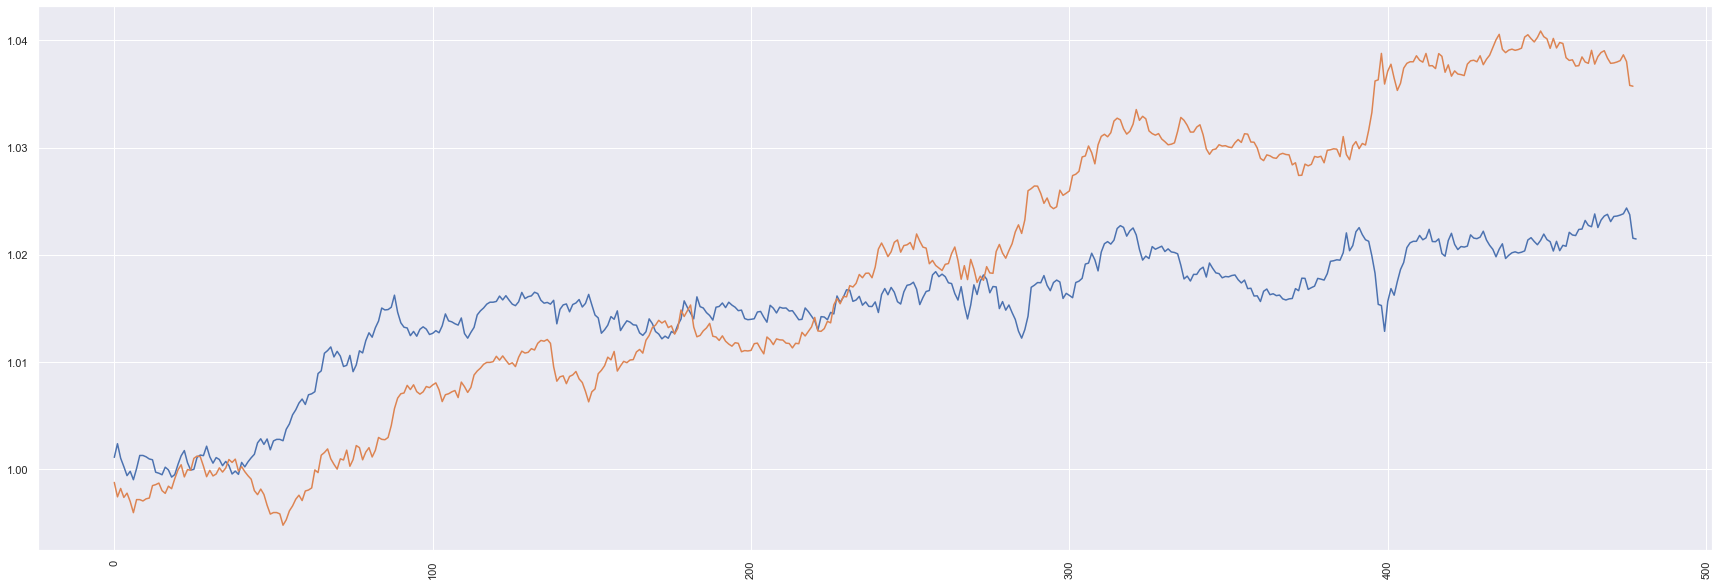

In [21]:
plt.plot(np.exp(df3['market_returns'].dropna().astype('float64')).cumprod(), label='Buy/Hold')
plt.plot(np.exp(df3['result'].dropna().astype('float64')).cumprod(), label='Strategy')
plt.xticks(rotation=90)

In [22]:
initial_capital = float(100000.0)

# Create df positions
positions = pd.DataFrame(index=df2.time.index).fillna(0.0)


# Buy 2 BTC
positions['BTC-PERP'] = 2*df['position']

# Initilize portfolio w value owned
portfolio = positions.multiply(df['close'], axis=0)

# Store diff in shares owned
pos_diff = positions.diff()

# Add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(df['close'], axis=0)).sum(axis=1)

# Add 'cash' to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['close'], axis=0)).sum(axis=1).cumsum()

# Add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add 'returns' to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['time'] = df['time']
portfolio

,BTC-PERP,holdings,cash,total,returns,time
33,109190.0,109190.0,100000.0,209190.0,NaN,1.633911e+12
34,109392.0,109392.0,100000.0,209392.0,0.000966,1.633911e+12
35,109508.0,109508.0,100000.0,209508.0,0.000554,1.633911e+12
36,109550.0,109550.0,100000.0,209550.0,0.000200,1.633911e+12
37,-109594.0,-109594.0,319188.0,209594.0,0.000210,1.633911e+12
...,...,...,...,...,...,...
1474,114350.0,114350.0,98076.0,212426.0,-0.000856,1.633997e+12
1475,114266.0,114266.0,98076.0,212342.0,-0.000395,1.633997e+12
1476,114258.0,114258.0,98076.0,212334.0,-0.000038,1.633997e+12
1477,114196.0,114196.0,98076.0,212272.0,-0.000292,1.633997e+12
